In [26]:
import sys
sys.path.append("../../")

In [27]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.datasets import load_bikeshare
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

from ml.model.metrics import Metrics
from ml.visualization.visualization import Visualization

# Dataset - Boston House Prices

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

In [28]:
data = load_boston()

In [29]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [30]:
X = df.drop(columns="target")
y = df["target"]

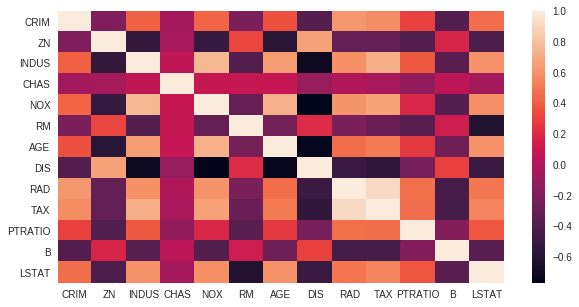

In [31]:
fig, ax = plt.subplots(figsize=(10,5))  
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

In [32]:
def train_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Metricas:")
    print(Metrics.regression(y_test, y_pred))
    #plot predicoes real e previsto
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()  
    #plot residuos
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()  

# Versão 1 - dado original

## Qual a distribuição dos preços das casa?

In [35]:
y = y*100

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

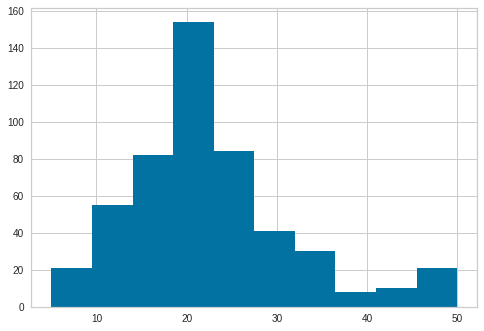

In [8]:
plt.hist(y)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f648f7283d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f648f728dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f648f713710>],
 'medians': [<matplotlib.lines.Line2D at 0x7f648f736850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f648f736d50>],
 'means': []}

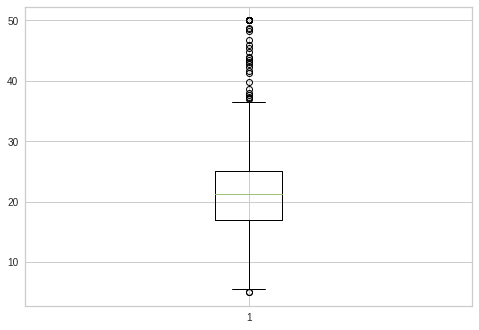

In [11]:
plt.boxplot(y)

Metricas:
{'mean_absolute_error': 314.8255755, 'root_mean_squared_error': 455.2364598, 'r2': 0.7261571, 'smape': 8.3832455, 'mape': 16.1213676}


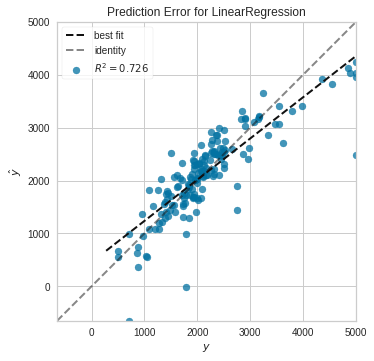

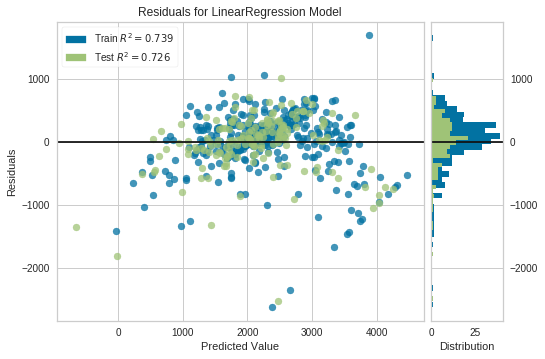

In [36]:
train_model(X,y)

# Versão 2 - adicionando 1 outiler, o dobro do valor máximo 

A média é 22 e o maior valor é 50

In [12]:
print(np.max(y))
print(np.min(y))
print(np.mean(y))

50.0
5.0
22.532806324110698


{'whiskers': [<matplotlib.lines.Line2D at 0x7f648fd28dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6494aa1410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f648f482f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6494aa1cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6494aad410>],
 'means': []}

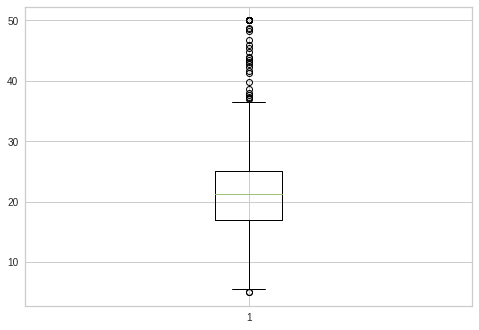

In [13]:
plt.boxplot(y)

(array([ 85., 264., 102.,  27.,  27.,   0.,   0.,   0.,   0.,   1.]),
 array([  5. ,  14.5,  24. ,  33.5,  43. ,  52.5,  62. ,  71.5,  81. ,
         90.5, 100. ]),
 <a list of 10 Patch objects>)

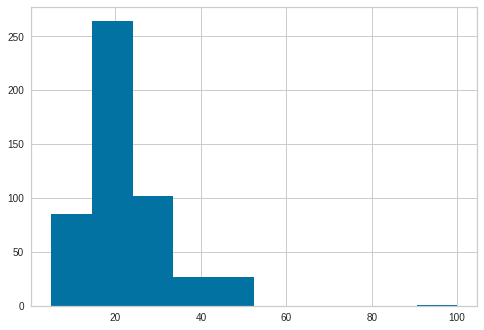

In [17]:
plt.hist(y)

Vou substituir a primeira posição de 24 para 100 (2 vezes o maior valor)

In [19]:
y.loc[0] = 100

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6494b3a1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6496da5490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6496cb5190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6496cda390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6496cda150>],
 'means': []}

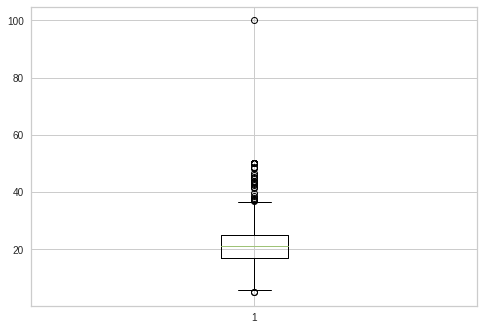

In [20]:
plt.boxplot(y)

Agora vamos rodar o modelo

Metricas:
{'mean_absolute_error': 3.5316086, 'root_mean_squared_error': 7.0610794, 'r2': 0.5556367, 'smape': 8.6393128, 'mape': 15.4152974}


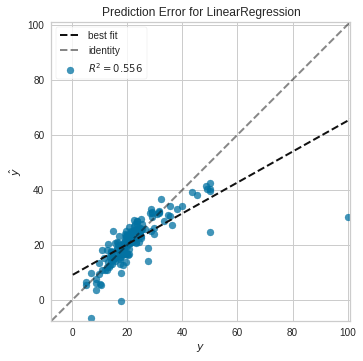

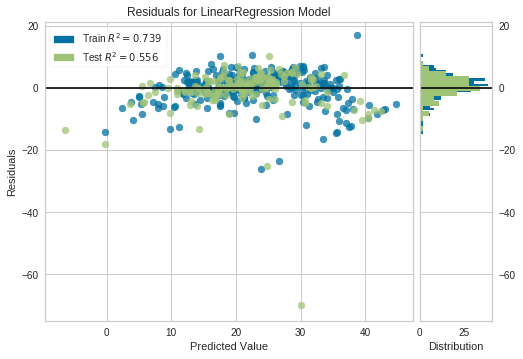

In [21]:
train_model(X,y)

# Versão 3 - adicionando 1 outiler, três vezes do valor máximo

In [22]:
y.loc[0] = 150

(array([192., 260.,  35.,  18.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  5. ,  19.5,  34. ,  48.5,  63. ,  77.5,  92. , 106.5, 121. ,
        135.5, 150. ]),
 <a list of 10 Patch objects>)

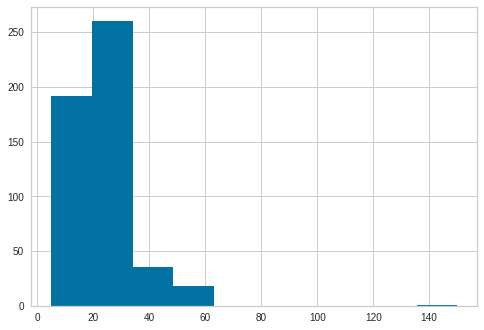

In [24]:
plt.hist(y)

Metricas:
{'mean_absolute_error': 3.8310098, 'root_mean_squared_error': 10.3320393, 'r2': 0.3855373, 'smape': 8.716067, 'mape': 15.4761357}


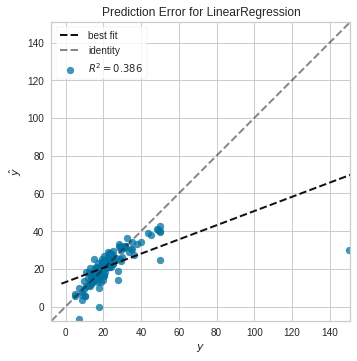

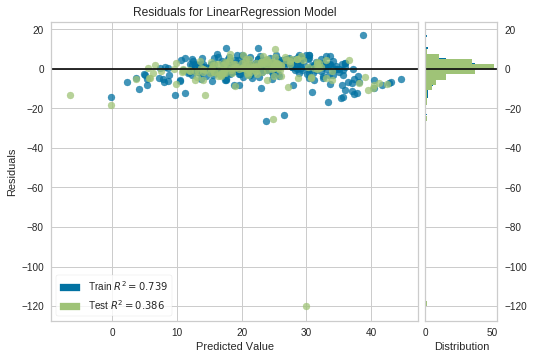

In [25]:
train_model(X,y)